In [1]:
import pandas as pd 
import numpy as np
import string 
import itertools
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import metrics 
df = pd.read_csv('drugsComtrain.csv' , sep ='\t')

In [2]:
df

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37
...,...,...,...,...,...,...,...
161292,191035,Campral,Alcohol Dependence,"""I wrote my first report in Mid-October of 201...",10.0,"May 31, 2015",125
161293,127085,Metoclopramide,Nausea/Vomiting,"""I was given this in IV before surgey. I immed...",1.0,"November 1, 2011",34
161294,187382,Orencia,Rheumatoid Arthritis,"""Limited improvement after 4 months, developed...",2.0,"March 15, 2014",35
161295,47128,Thyroid desiccated,Underactive Thyroid,"""I&#039;ve been on thyroid medication 49 years...",10.0,"September 19, 2015",79


In [3]:
df.condition.unique().shape

(885,)

In [4]:
df.condition.value_counts().head(12)

condition
Birth Control              28788
Depression                  9069
Pain                        6145
Anxiety                     5904
Acne                        5588
Bipolar Disorde             4224
Insomnia                    3673
Weight Loss                 3609
Obesity                     3568
ADHD                        3383
Diabetes, Type 2            2554
Emergency Contraception     2463
Name: count, dtype: int64

In [5]:
# iter tools can be used for many purposes like -> Hyper parameter tuning , plotting something , confusion matrix and all 


In [6]:
# pd.set_option('display.max_rows' , None) - To print all the values in the dataset

In [7]:
df_train = df[(df['condition']=='Birth Control') | (df['condition']=='Depression') | (df['condition']=='Pain') | (df['condition']=='Anxiety')| (df['condition']=='Acne') | (df['condition']=='Bipolar Disorde') | (df['condition']=='Insomnia')]

In [8]:
df_train.shape

(63391, 7)

In [9]:
X = df_train[['condition', 'review']]

In [10]:
X

,condition,review
2,Birth Control,"""I used to take another oral contraceptive, wh..."
3,Birth Control,"""This is my first time using any form of birth..."
7,Bipolar Disorde,"""Abilify changed my life. There is hope. I was..."
9,Birth Control,"""I had been on the pill for many years. When m..."
11,Depression,"""I have taken anti-depressants for years, with..."
...,...,...
161277,Insomnia,"""I started taking this medication 10 years ago..."
161283,Bipolar Disorde,"""I was in a very bad place at the time I start..."
161286,Depression,"""This is the third med I&#039;ve tried for anx..."
161287,Anxiety,"""I was super against taking medication. I&#039..."


In [11]:
# Performing Exploratory Data Analysis 

In [12]:
X.condition.value_counts()

condition
Birth Control      28788
Depression          9069
Pain                6145
Anxiety             5904
Acne                5588
Bipolar Disorde     4224
Insomnia            3673
Name: count, dtype: int64

In [13]:
X.head()

,condition,review
2,Birth Control,"""I used to take another oral contraceptive, wh..."
3,Birth Control,"""This is my first time using any form of birth..."
7,Bipolar Disorde,"""Abilify changed my life. There is hope. I was..."
9,Birth Control,"""I had been on the pill for many years. When m..."
11,Depression,"""I have taken anti-depressants for years, with..."


In [14]:
X_birth = X[(X['condition']=='Birth Control')]
X_dep = X[(X['condition']=='Depression ')]
X_bp = X[(X['condition']=='High Blood Pressure')]
X_diab = X[(X['condition']=='Diabetes, Type 2')]
X_adhd = X[(X['condition']=='ADHD')]
X_em_contraception = X[(X['condition']=='Emergency Contraception')]
X_acne = X[(X['condition']=='Acne')]
X_anxiety = X[(X['condition']=='Anxiety')]
X_insomnia = X[(X['condition']=='Insomnia')]
X_Weight_Loss = X[(X['condition']=='Weight Loss')]
X_Obesity = X[(X['condition']=='Obesity')]
X_bipolar = X[(X['condition']=='Bipolar Disorde')]
X_pain = X[(X['condition']=='Pain')]

In [15]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


Text(0.5, 1.0, 'Word Cloud for Anxiety')

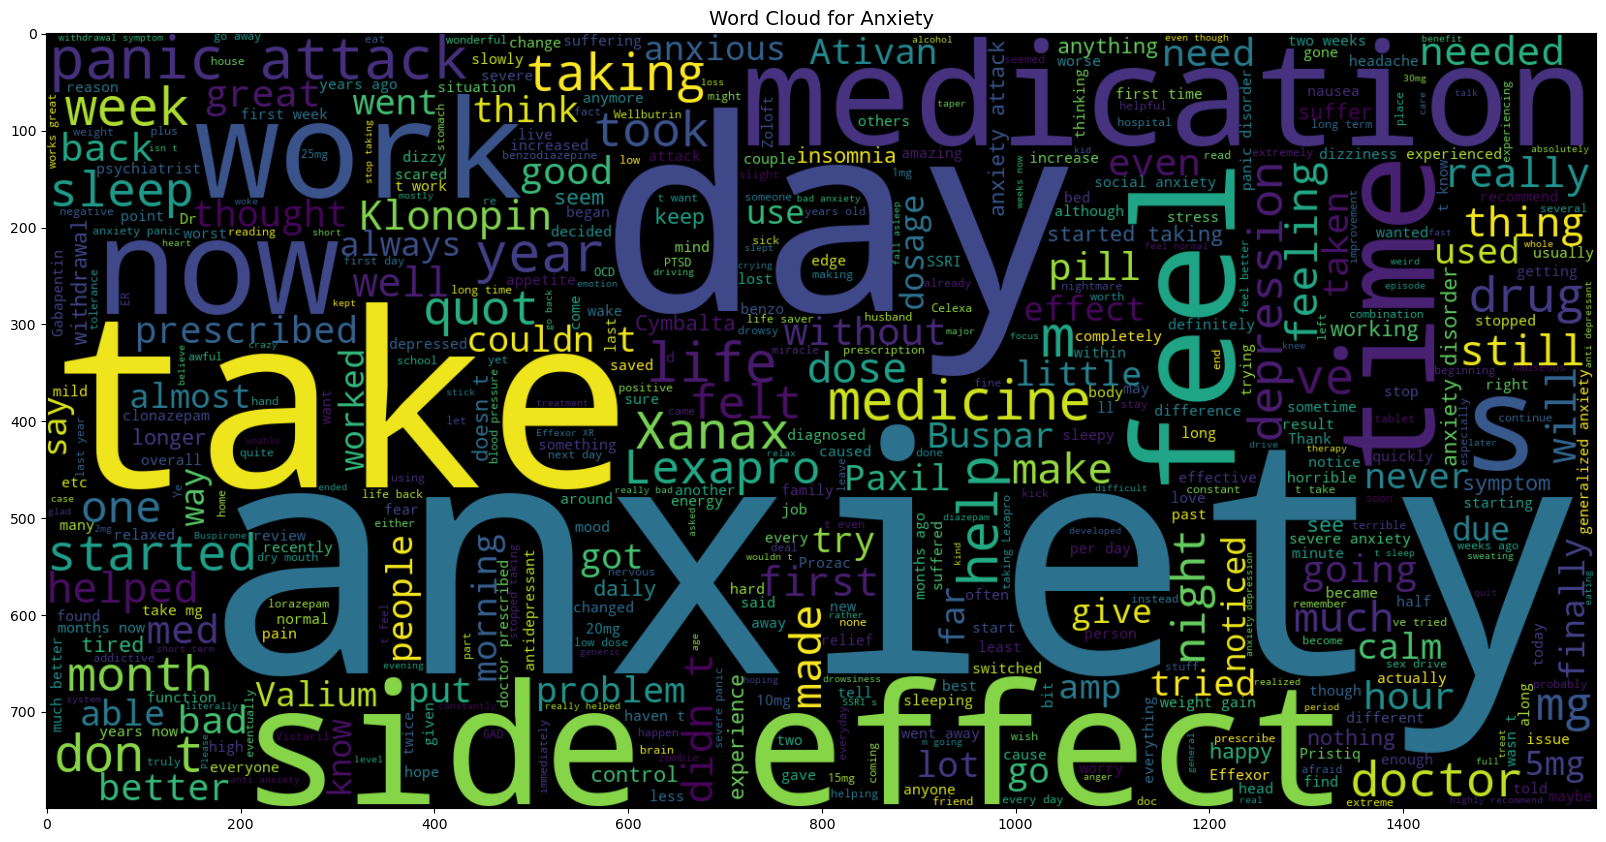

In [16]:

from wordcloud import WordCloud 
plt.figure(figsize=(20,20))
wc = WordCloud(max_words= 500 , width = 1600, height = 800).generate(" ".join(X_anxiety.review))
plt.imshow(wc, interpolation = 'bilinear')
plt.title('Word Cloud for Anxiety' ,fontsize=14)

In [17]:
wc

In [18]:
for i, col in enumerate(X.columns):
    X.iloc[:,i] = X.iloc[:,i].str.replace(' " ', ' ' )

In [19]:
X.head()

,condition,review
2,Birth Control,"""I used to take another oral contraceptive, wh..."
3,Birth Control,"""This is my first time using any form of birth..."
7,Bipolar Disorde,"""Abilify changed my life. There is hope. I was..."
9,Birth Control,"""I had been on the pill for many years. When m..."
11,Depression,"""I have taken anti-depressants for years, with..."


In [20]:
import nltk 
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
stop = stopwords.words('english')
from bs4 import BeautifulSoup 
import re


In [21]:
lemmatizer = WordNetLemmatizer()

In [22]:
pip install lxml

Note: you may need to restart the kernel to use updated packages.


In [23]:
pip install html.parser

Note: you may need to restart the kernel to use updated packages.


In [24]:
def review_to_words(raw_review):
    review_text = BeautifulSoup(raw_review,'html.parser').get_text() # Deleting html elements after web scrapping
    letters_only = re.sub('[^a-zA-Z]' , ' ' , review_text) 
    words = letters_only.lower().split()
    meaningful_words = [ w for w in words if not w in stop ]
    lemm_words = [ lemmatizer.lemmatize(w) for w in meaningful_words ]
    return(' '.join(lemm_words))

    

In [25]:
X['review_clean'] = X['review'].apply(review_to_words)

/var/folders/yt/m3t63_md6313mdtp_6bbphtw0000gn/T/ipykernel_27322/3219453185.py:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review_text = BeautifulSoup(raw_review,'html.parser').get_text() # Deleting html elements after web scrapping
/var/folders/yt/m3t63_md6313mdtp_6bbphtw0000gn/T/ipykernel_27322/608967001.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['review_clean'] = X['review'].apply(review_to_words)


In [30]:
X.head()

,condition,review,review_clean
2,Birth Control,"""I used to take another oral contraceptive, wh...",used take another oral contraceptive pill cycl...
3,Birth Control,"""This is my first time using any form of birth...",first time using form birth control glad went ...
7,Bipolar Disorde,"""Abilify changed my life. There is hope. I was...",abilify changed life hope zoloft clonidine fir...
9,Birth Control,"""I had been on the pill for many years. When m...",pill many year doctor changed rx chateal effec...
11,Depression,"""I have taken anti-depressants for years, with...",taken anti depressant year improvement mostly ...


In [31]:
X_features = X['review_clean']
y = X['condition']
X_train , X_test , y_train , y_test = train_test_split(X_features ,y , stratify = y , test_size = 0.2 , random_state = 0 )

In [32]:
count_vectorizer = CountVectorizer(stop_words = 'english')
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)

In [33]:
count_train

<50712x20800 sparse matrix of type '<class 'numpy.int64'>'
	with 1571760 stored elements in Compressed Sparse Row format>

In [34]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(count_train , y_train)
pred = rf.predict(count_test)
score = metrics.accuracy_score(y_test , pred)
print("accuracy; %0.3f" % score)

accuracy; 0.923


In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words = 'english' , max_df = 0.80)
tfidf_train_2 = tfidf_vectorizer.fit_transform(X_train)
tfidf_test_2 = tfidf_vectorizer.transform(X_test)

In [37]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(count_train , y_train)
pred = rf.predict(count_test)
score = metrics.accuracy_score(y_test , pred)
print("accuracy; %0.3f" % score)

accuracy; 0.923


In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words = 'english' , max_df = 0.80 , ngram_range=(1,3))
tfidf_train_2 = tfidf_vectorizer.fit_transform(X_train)
tfidf_test_2 = tfidf_vectorizer.transform(X_test)

In [39]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(count_train , y_train)
pred = rf.predict(count_test)
score = metrics.accuracy_score(y_test , pred)
print("accuracy; %0.3f" % score)

accuracy; 0.923


In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words = 'english' , max_df = 0.80 , ngram_range=(1,5))
tfidf_train_2 = tfidf_vectorizer.fit_transform(X_train)
tfidf_test_2 = tfidf_vectorizer.transform(X_test)

In [41]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(count_train , y_train)
pred = rf.predict(count_test)
score = metrics.accuracy_score(y_test , pred)
print("accuracy; %0.3f" % score)

accuracy; 0.923


In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words = 'english' , max_df = 0.80 , ngram_range=(1,7))
tfidf_train_2 = tfidf_vectorizer.fit_transform(X_train)
tfidf_test_2 = tfidf_vectorizer.transform(X_test)

In [46]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(count_train , y_train)
pred = rf.predict(count_test)
score = metrics.accuracy_score(y_test , pred)
print("accuracy; %0.3f" % score)

accuracy; 0.922


In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words = 'english' , max_df = 0.80 , ngram_range=(1,10))
tfidf_train_2 = tfidf_vectorizer.fit_transform(X_train)
tfidf_test_2 = tfidf_vectorizer.transform(X_test)

In [48]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(count_train , y_train)
pred = rf.predict(count_test)
score = metrics.accuracy_score(y_test , pred)
print("accuracy; %0.3f" % score)

accuracy; 0.924
